# Lab 6 - Love and linear ODEs

### Name: Robert Sucholeiki
### Lab section: Friday

In [1]:
#Necessary imports
import numpy as np #package for work with arrays and matrices
import matplotlib.pyplot as plt #package with plotting capabilities
from scipy.integrate import odeint # function for solving ODEs

## Part 1: Phase plane and eigenvalues

Use the code in lab6_examples.ipynb file as a template to create a function with the following characteristics:

* INPUTS: four parameters of a linear 2-variable ODE, x and y limits of the phase plane, grid spacing 
* DO: Produce a phase plane plot and calculate the eigenvalues of the defining matrix
* OUTPUT: the eigenvalues of the defining matrix
 
For each of the six two-variable ODEs in problem set 3, call the function with the given parameters values (a,b,c, d) and classify the phase plane using the eigenvalues.

**Q1.1:** matrix 1 from problem set 3

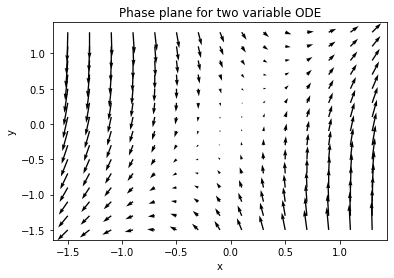

The eigenvalues are [ 2. -3.]


In [3]:
def ode_func (a, b, c, d, xmin, xmax, ymin, ymax, dx, dy):
    X = np.arange(xmin, xmax, dx)
    Y = np.arange(ymin, ymax, dy)
    x,y = np.meshgrid(X,Y) #create a grid
    dxdt = a*x+b*y #overwrites the other dx
    dydt = c*x+d*y #overwrites the other dy
    fig, ax = plt.subplots()
    ax.quiver(x, y, dxdt, dydt) #create a phase plane plot
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Phase plane for two variable ODE')
    plt.show()
    A=np.array([[a,b],[c,d]]) #create a matrix from the ODE parameters
    evals, evecs = np.linalg.eig(A)
    return evals, evecs

#For matrix 1 from problem set 3
a = 1
b = 1
c = 4
d = -2

#Phase plane limits and spacing
xmin = -1.5 
xmax = 1.5
ymin = -1.5
ymax = 1.5
dx = 0.2 
dy = 0.2 

evals, evecs = ode_func (a, b, c, d, xmin, xmax, ymin, ymax, dx, dy)
print('The eigenvalues are ' + str(evals))

Because both eigenvalues are real, one positive and one negative, the phase plane shows a saddle point.

**Q1.2:** matrix 2 from problem set 3

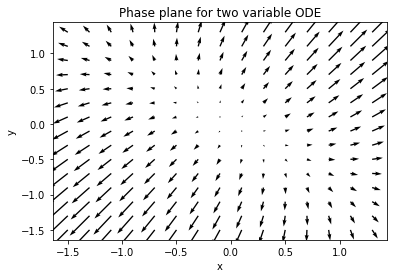

The eigenvalues are [3. 1.]


In [4]:
#For matrix 2 from problem set 3
a = 2
b = 1
c = 1
d = 2

evals, evecs = ode_func (a, b, c, d, xmin, xmax, ymin, ymax, dx, dy)
print('The eigenvalues are ' + str(evals))

Because both eigenvalues are real and both are positive, the phase plane shows an unstable node. 

**Q1.3:** matrix 3 from problem set 3

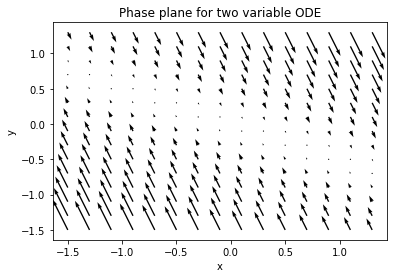

The eigenvalues are [ 0. -3.]


In [5]:
#For matrix 3 from problem set 3
a = 1
b = 2
c = -2
d = -4

evals, evecs = ode_func (a, b, c, d, xmin, xmax, ymin, ymax, dx, dy)
print('The eigenvalues are ' + str(evals))

Both eigenvalues are real. Because one is zero and the other is a negative number, we have a fixed line in the phase plane. The line is stable. 

**Q1.4:** matrix 4 from problem set 3

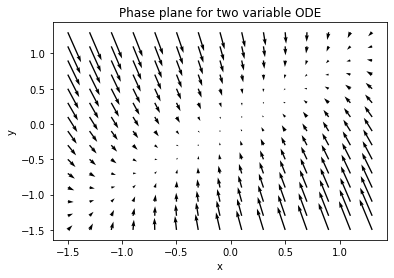

The eigenvalues are [-1. -5.]


In [9]:
#For matrix 4 from problem set 3
a = -2
b = 1
c = 3
d = -4

evals, evecs = ode_func (a, b, c, d, xmin, xmax, ymin, ymax, dx, dy)
print('The eigenvalues are ' + str(evals))

Because there are two real eigenvalues, and both are negative, the phase plane shows a stable node. 

**Q1.5:** matrix 5 from problem set 3 

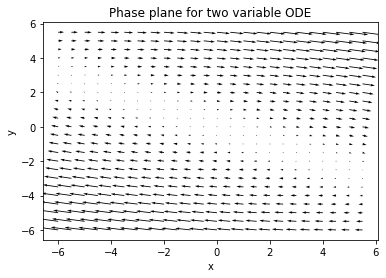

The eigenvalues are [2.+1.j 2.-1.j]


In [192]:
#For matrix 5 from problem set 3
a = 5
b = 10
c = -1
d = -1 

evals, evecs = ode_func (a, b, c, d, xmin, xmax, ymin, ymax, dx, dy)
print('The eigenvalues are ' + str(evals))

Both eigenvalues are complex numbers with positive real parts. The phase plane shows an unstable spiral. 

**Q1.6:** matrix 6 from problem set 3

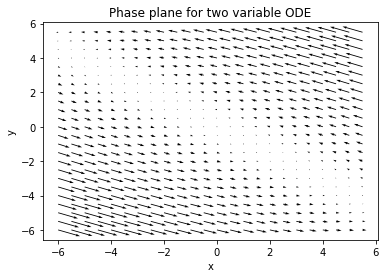

The eigenvalues are [-1. -1.]


In [194]:
#For matrix 6 from problem set 3
a = -3
b = -4
c = 1
d = 1

evals, evecs = ode_func (a, b, c, d, xmin, xmax, ymin, ymax, dx, dy)
print('The eigenvalues are ' + str(evals))

Because both eigenvalues are negative, real numbers, the phase plane shows a stable node. 

## Part 2: Solutions in the phase plane

Use the code in lab6_examples.ipynb file for calculating the numeric solutions of ODE to create a new function with the following characteristics:

 * INPUTS: four parameters of a linear 2-variable ODE, x and y limits of the phase plane, grid spacing, Tmax, dt, vector of x initial values, vector of y initial values
 * DO: 
     - create a phase portrait of the given 2-variable ODE
     - overlay solution trajectories starting from given initial values over the phase plane
     - plot different solutions overt time of X in one window and solutions of Y in another
 * OUTPUT: No variables to return
 
Hint: to generate and plot multiple solutions, create a for loop inside the function using the length of the initial values array 

For each of the six two-variable ODEs in problem set 3, use the above-defined function to make the phase portrait and two plots of solutions and
 * comment on where *each variable* (X and Y) of the solution ends up, and whether/how it depends on the intial values  
 * comment on how the classification you provided in part 1 is reflected in the dynamics of the solution trajectories

**Q2.1:**

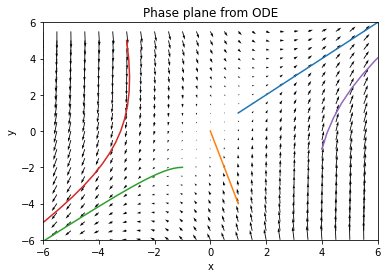

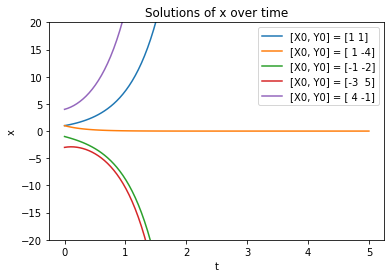

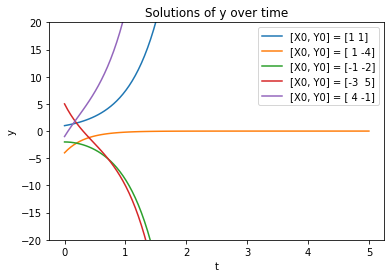

In [6]:
#Define a function for our ODE
def ODE_func(xy, t, a, b, c, d):  # inputs are: variable array, time, any parameters
    newxy = [a*xy[0]+b*xy[1], c*xy[0]+d*xy[1]]
    return newxy

#Define a function that will produce three plots (phase plane with solutions, x over time, and y over time)
#Plots are produced over a for loop for a randomly generated array of initial values
#For this function, I added two extra parameters: plot_min and plot_max. 
#These control the vertical limits of the x vs t and y vs t solution plots.
def ode_func_2 (a, b, c, d, xmin, xmax, ymin, ymax, dx, dy, Tmax, dt, x_init, y_init, plot_min, plot_max):
    init = np.column_stack((x_init, y_init)) 
    t = np.linspace(0, Tmax, dt) # create time vector 
    X = np.arange(xmin, xmax, dx)
    Y = np.arange(ymin, ymax, dy)
    x,y = np.meshgrid(X,Y) #create a grid
    [dxdt, dydt] = ODE_func([x,y], t, a, b, c, d)
    fig, ax = plt.subplots()
    q = ax.quiver(x, y, dxdt, dydt)
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    for i in np.arange(len(init)):
        xy = init[i]
        sol = odeint(ODE_func, init[i], t, args=(a, b, c, d)) # calculate numeric solution of ODE defined in fun
        plt.figure(1) #FIGURE 1: SOLUTIONS IN THE PHASE PLANE
        ax.plot(sol[:,0], sol[:,1]) # plot the x and the y variable in the phase plane
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Phase plane from ODE')
        plt.figure(2) #FIGURE 2: X OVER TIME
        plt.plot(t, sol[:,0], label = '[X0, Y0] = ' + str(xy)) # plot the x variable over time
        plt.legend()
        plt.xlabel('t')
        plt.ylabel('x')
        plt.title('Solutions of x over time')
        plt.ylim(plot_min, plot_max)
        plt.figure(3) #FIGURE 3: Y OVER TIME
        plt.plot(t, sol[:,1], label = '[X0, Y0] = ' + str(xy)) # plot the x variable over time
        plt.legend()
        plt.xlabel('t')
        plt.ylabel('y')
        plt.title('Solutions of y over time')
        plt.ylim(plot_min, plot_max)
    plt.show()
    return 
    
#Plot phase plane and solutions for Question 1
#Define initial x and y values
x_init = np.array([1,1,-1,-3,4])
y_init = np.array([1,-4,-2,5,-1])

#Phase plane limits and spacing
xmin = -6
xmax = 6
ymin = -6
ymax = 6
dx = 0.5
dy = 0.5 

#Time vector parameters
Tmax = 5
dt = 100

#Limits of the solution vs time plots
plot_min = -20
plot_max = 20

#For matrix 1 from problem set 3
a = 1
b = 1
c = 4
d = -2

ode_func_2 (a, b, c, d, xmin, xmax, ymin, ymax, dx, dy, Tmax, dt, x_init, y_init, plot_min, plot_max)

We see from the solutions of x vs t that for the majority of initial conditions, x will either grow to infinity or decay toward negative infinity over time. Whether x approaches infinity or negative infinity is determined by the initial x and y values. The exception is if the initial condition lies along the eigenvector corresponding to the negative eigenvalue. When the initial coniditon begins on this vector (a multiple of x0,y0 = 1,-4), then x will approach the saddle point at zero. 

Second, we see from the solutions of y vs t that for the majority of initial conditions, y can either grow to infinity or decay toward negative infinity over time. Whether y approaches infinity or negative infinity is determined by the initial x and y values. The exception is if the initial condition lies along the eigenvector corresponding to the negative eigenvalue. When the initial coniditon begins on this vector (a multiple of x0,y0 = 1,-4), then y will approach the saddle point at zero. 

This behavior of x and y reflects the classification of this phase plane as containing a saddle point. The saddle point is unstable, and the end behavior of x and y depends on how the initial solution approaches the saddle point. 

Imagine that we divide the phase plane into quadrants around the saddle point. If the initial condition begins in the upper or lower left quadrants, then x and y will ultimately both decay toward negative infinity. If the initial condition begins in the upper or lower right quadrants, then x and y will ultimately both approach positive infinity. In both cases, solutions will initially "curve" toward the saddle point and then rebound away. 

**Q2.2:**

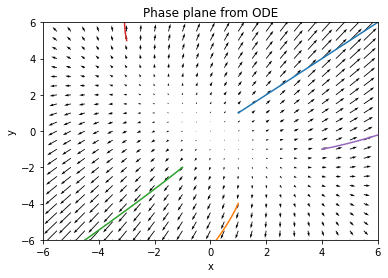

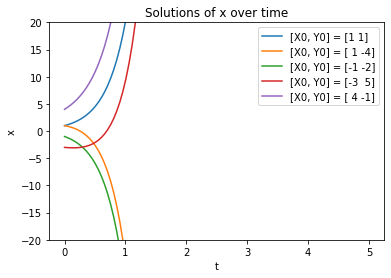

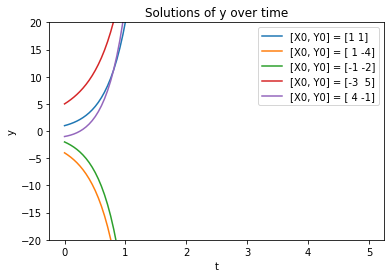

In [178]:
#For matrix 2 from problem set 3
a = 2
b = 1
c = 1
d = 2

ode_func_2 (a, b, c, d, xmin, xmax, ymin, ymax, dx, dy, Tmax, dt, x_init, y_init, plot_min, plot_max)

We see from the solutions of x vs t that x can either grow to infinity or decay toward negative infinity over time. Whether x approaches infinity or negative infinity is determined by the initial x and y values. 

Second, we see from the solutions of y vs t that y can either grow to infinity or decay toward negative infinity over time. Whether y approaches infinity or negative infinity is determined by the initial x and y values. 

This behavior of x and y reflects the classification of this phase plane as containing an unstable node. The end behavior of x and y depends on where the initial condition is located in the phase plane relative to the unstable node. In all cases, the solutions will diverge from the unstable node. 

Initial conditions on the upper left of the unstable node will tend to diverge so that x approaches negative infinity and y approaches positive infinity. Initial conditions on the upper right of the unstable node will tend to diverge so that x and y both approach positive infinity. Initial conditions on the lower left of the unstable node will tend to diverge so that x and y both approach negative infinity. Initial conditions on the lower left of the unstable node will tend to diverge so that x approaches positive infinity and y approaches negative infinity. 

**Q2.3:**

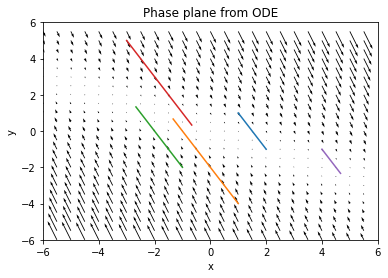

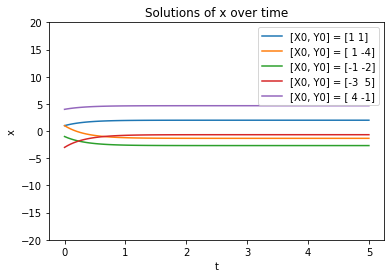

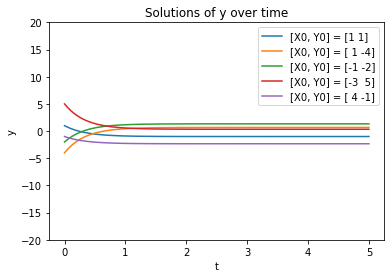

In [179]:
#For matrix 3 from problem set 3
a = 1
b = 2
c = -2
d = -4

ode_func_2 (a, b, c, d, xmin, xmax, ymin, ymax, dx, dy, Tmax, dt, x_init, y_init, plot_min, plot_max)

We see from the solutions of x vs t that x approaches one among any number of x values that lie along the stable line on the phase plane. Similarly, we see from the solutions of y vs t that y approaches one of any number of y values that lie along the stable line on the phase plane. 

This behavior of x and y reflects the classification of this phase plane as containing a stable line. This stable line is defined by the eigenvector that corresponds to the eigenvalue of 0. No matter the initial condition, the solutions approach the stable line. All solutions approach the stable line in the direction of the eigenvector corresponding to the nonzero eigenvalue. The exact final x and y values that each solution ends upon is determined by the initial condition and its location relative to the stable line.  

**Q2.4:**

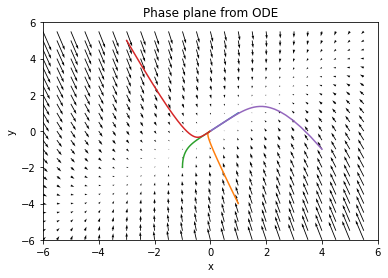

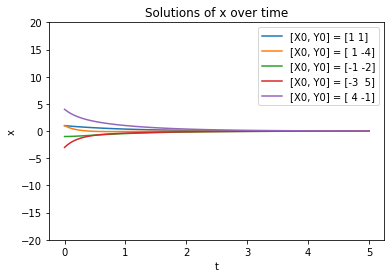

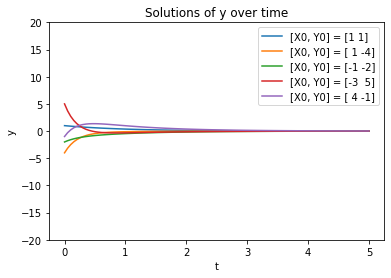

In [180]:
#For matrix 4 from problem set 3
a = -2
b = 1
c = 3
d = -4

ode_func_2 (a, b, c, d, xmin, xmax, ymin, ymax, dx, dy, Tmax, dt, x_init, y_init, plot_min, plot_max)

We see from the solutions of x vs t that x approaches zero at large values of time irrespective of the initial condition. Similarly, we see from the solutions of y vs t that y approaches zero at large time values irrespective of the initial condition. 

This behavior of x and y reflects the classification of this phase plane as containing a stable node. All solutions will converge to this node at the origin regardless of the initial conditions. 

**Q2.5:**

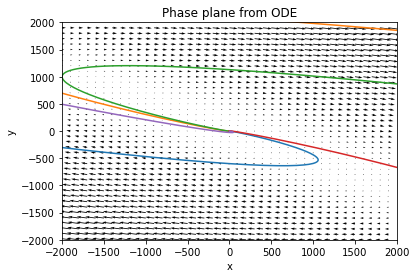

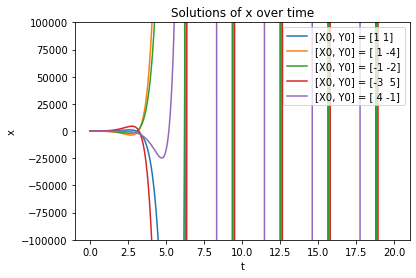

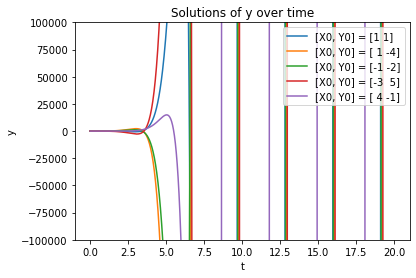

In [189]:
#For matrix 5 from problem set 3
a = 5
b = 10
c = -1
d = -1 

#Let's make a longer time array for this question
#Time vector parameters
Tmax = 20
dt = 1000

#Change limits of solution plot
plot_min = -100000
plot_max = 100000

#Phase plane limits and spacing to better see the solutions
xmin = -2000
xmax = 2000
ymin = -2000
ymax = 2000
dx = 100
dy = 100

ode_func_2 (a, b, c, d, xmin, xmax, ymin, ymax, dx, dy, Tmax, dt, x_init, y_init, plot_min, plot_max)

We see here that both x and y oscillate over time. The oscillations are huge in magnitude; both x and y pass through very large magnitude positive and negative values as the solutions oscillate. This end behavior occurs irrespective of initial condition. 

This alligns with our definition of this phase plane as an unstable spiral. We see in the phase portrait that the solutions spiral outwards from their initial conditions, diverging from the center of the spiral. 

Unfortunately, the behavior of the ODE solutions is difficult to visualize due to the huge magitude of the x and y oscillations. Because this is an unstable spiral as predicted from the eigenvalues, we would predict that the x and y oscillations increase in amplitude over time. But when we stretch the limits of our x vs t and y vs t plots to large numbers (here graph limits of +/- 100000), we are still unable to fully visualize these oscillations due to how large they are. 

**Q2.6:**

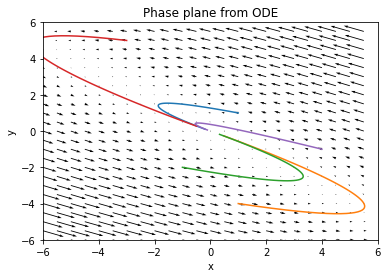

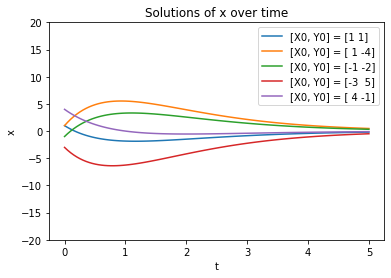

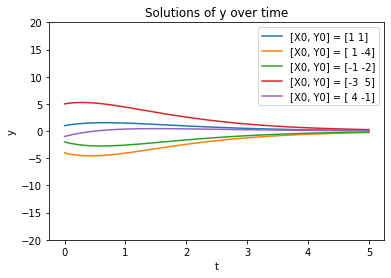

In [190]:
#For matrix 6 from problem set 3
a = -3
b = -4
c = 1
d = 1

#Let's return the time array to what it was before
#Time vector parameters
Tmax = 5
dt = 100

#Change limits of solution plot to what they were before
plot_min = -20
plot_max = 20

#Phase plane limits and spacing 
xmin = -6
xmax = 6
ymin = -6
ymax = 6
dx = 0.5
dy = 0.5 

ode_func_2 (a, b, c, d, xmin, xmax, ymin, ymax, dx, dy, Tmax, dt, x_init, y_init, plot_min, plot_max)

We see from the solutions of x vs t that x approaches zero at large values of time irrespective of the initial condition. Similarly, we see from the solutions of y vs t that y approaches zero at large time values irrespective of the initial condition. 

This behavior of x and y reflects the classification of this phase plane as containing a stable node. All solutions will converge to this node at the origin regardless of the initial conditions. What is interesting about this phase plane is that each trajectory tends to "curve" outwards initially in the x direction and then curve back in to converge to the stable node. 

## Part 3: love in the phase plane
The following model is taken from Steven Strogatz, applied mathematician and educator extraordinaire (see [Stogatz, Nonlinear Dynamics and Chaos](http://www.stevenstrogatz.com/books/nonlinear-dynamics-and-chaos-with-applications-to-physics-biology-chemistry-and-engineering)).

Suppose person $R$ and person $J$ are in a romantic relationship and their feelings (positive or negative) are quantified by these two variables, while the changes in feelings are described by a system of autonomous linear ODEs:

$$
\frac{dR}{dt} = a R + b J \\
\frac{dJ}{dt} = c R + d J
$$

in which $a$ and $d$ are the self-awareness parameters and $b$ and $c$ are the parameters of responsiveness to the other. 

Use the function you defined in part 2 above to explore the following scenarios in this model.

### 3.1
Suppose $R$ and $J$ are both totally and identically self-absorbed, that is $a=d$ and $b=c=0$. Investigate the dynamics of the model under these conditions, and plot solutions separately for positive self-awareness ($a=d >0$) and for negative self-awareness ($a = d <0$). Describe verbally the predicted fate of the relationship.

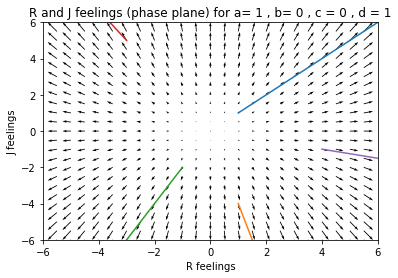

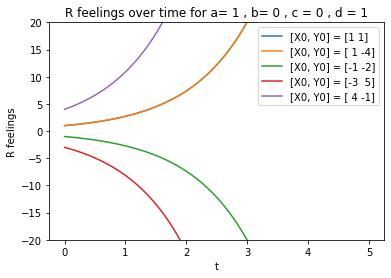

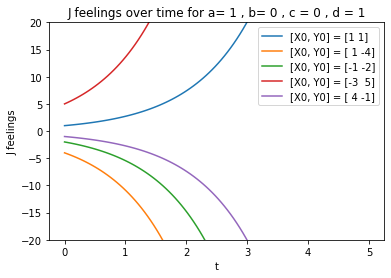

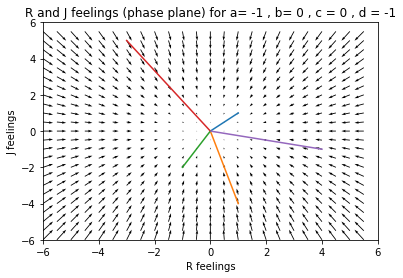

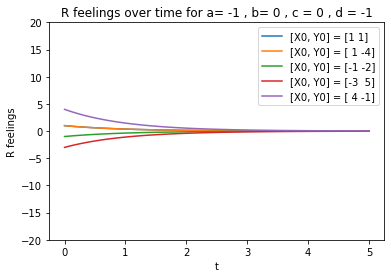

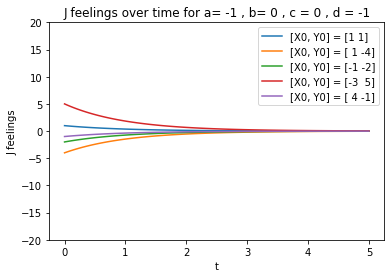

In [7]:
#Here I edit the function to change some plot labels to reflect the questions in Part 3
def ode_func_2 (a, b, c, d, xmin, xmax, ymin, ymax, dx, dy, Tmax, dt, x_init, y_init, plot_min, plot_max):
    init = np.column_stack((x_init, y_init)) 
    t = np.linspace(0, Tmax, dt) # create time vector 
    X = np.arange(xmin, xmax, dx)
    Y = np.arange(ymin, ymax, dy)
    x,y = np.meshgrid(X,Y) #create a grid
    [dxdt, dydt] = ODE_func([x,y], t, a, b, c, d)
    fig, ax = plt.subplots()
    q = ax.quiver(x, y, dxdt, dydt)
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    for i in np.arange(len(init)):
        xy = init[i]
        sol = odeint(ODE_func, init[i], t, args=(a, b, c, d)) # calculate numeric solution of ODE defined in fun
        plt.figure(1) #FIGURE 1: SOLUTIONS IN THE PHASE PLANE
        ax.plot(sol[:,0], sol[:,1]) # plot the x and the y variable in the phase plane
        plt.xlabel('R feelings')
        plt.ylabel('J feelings')
        plt.title('R and J feelings (phase plane) for a= ' + str(a) + ' , b= ' + str(b) + ' , c = ' + str(c) + ' , d = ' + str(d))
        plt.figure(2) #FIGURE 2: X OVER TIME
        plt.plot(t, sol[:,0], label = '[X0, Y0] = ' + str(xy)) # plot the x variable over time
        plt.legend()
        plt.xlabel('t')
        plt.ylabel('R feelings')
        plt.title('R feelings over time for a= ' + str(a) + ' , b= ' + str(b) + ' , c = ' + str(c) + ' , d = ' + str(d))
        plt.ylim(plot_min, plot_max)
        plt.figure(3) #FIGURE 3: Y OVER TIME
        plt.plot(t, sol[:,1], label = '[X0, Y0] = ' + str(xy)) # plot the x variable over time
        plt.legend()
        plt.xlabel('t')
        plt.ylabel('J feelings')
        plt.title('J feelings over time for a= ' + str(a) + ' , b= ' + str(b) + ' , c = ' + str(c) + ' , d = ' + str(d))
        plt.ylim(plot_min, plot_max)
    plt.show()
    return 


#First let's plot solutions for positive self awareness
#POSITIVE SELF AWARENESS: a = d > 0
a = 1
b = 0
c = 0
d = 1

ode_func_2 (a, b, c, d, xmin, xmax, ymin, ymax, dx, dy, Tmax, dt, x_init, y_init, plot_min, plot_max)

#Next, let's plot negative self awareness
#NEGATIVE SELF AWARENESS: a = d < 0 
a = -1
b = 0
c = 0
d = -1

ode_func_2 (a, b, c, d, xmin, xmax, ymin, ymax, dx, dy, Tmax, dt, x_init, y_init, plot_min, plot_max)

When R and J are both completely self absorbed, the fate of the relationship depends on whether they are completely positively self aware, or completely negatively self aware. 

When R and J are both completely positively self aware, the feelings of R and J both diverge from zero exponentially. How these each individual's feelings toward's the other change (whether they become extremely positive, or extremely hateful over time) depends on the initial conidition of the relationship. 

When R and J are both completely negatively self aware, the feelings of R and J both converge to zero over time. This means that over time R and J both become completely apathetic toward eachother. 

### 3.2
Suppose $R$ and $J$ are again identical, but now they are totally not self-aware that is $a=d=0$ and identically responsive to each other $b=c$. Investigate the dynamics of the model under these conditions, and plot solutions separately for positive responsiveness ($b = c >0$) and for negative responsiveness ($b = c <0$). Describe verbally the predicted fate of the relationship.

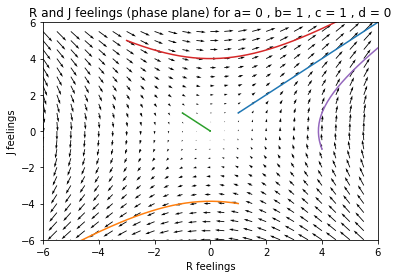

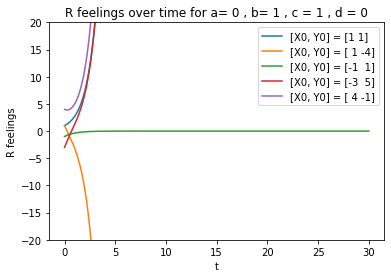

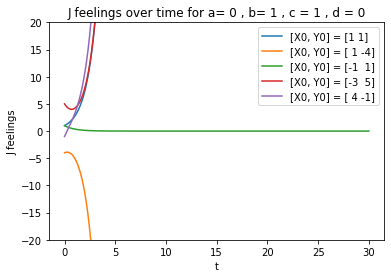

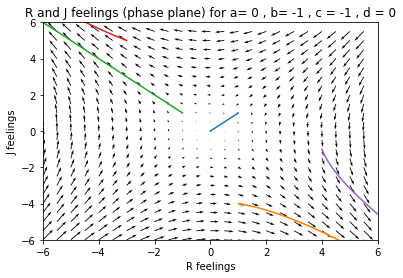

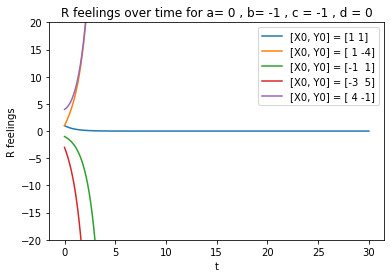

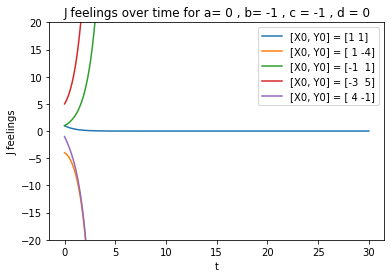

In [253]:
#Define initial x and y values - one of the initial values is changed to -1,1 to better explore the solutions here
x_init = np.array([1,1,-1,-3,4])
y_init = np.array([1,-4,1,5,-1])

#First let's plot solutions for positive responsiveness
#POSITIVE RESPONSIVENESS: b = c > 0
a = 0
b = 1
c = 1
d = 0

ode_func_2 (a, b, c, d, xmin, xmax, ymin, ymax, dx, dy, Tmax, dt, x_init, y_init, plot_min, plot_max)


#Next, let's plot negative responsiveness
#NEGATIVE RESPONSIVENESS: b = c < 0 
a = 0
b = -1
c = -1
d = 0

ode_func_2 (a, b, c, d, xmin, xmax, ymin, ymax, dx, dy, Tmax, dt, x_init, y_init, plot_min, plot_max)


When R and J are both completely responsive, then for most initial relationship conditions, the feelings of R and J, for each individual, will grow exponentially in either hateful or loving directions. The exception is if the initial relationship feelings lie in a point along the eigenvector correponsing to the negative eigenvalue for the parameter matrix, as we will see in the two cases below. This is because this phase plane model contains a saddle point. 

When R and J are both completely positively self aware, the feelings of R and J both diverge from zero exponentially. For the majority of initial relationship conditions, either both R and J grow very positive feelings tending toward (+) infinity, or both R and J grow very negative feelings tending toward (-) infinity. This behavior is dependent upon the initial conditions. The exception is if R and J have initial feelings lying along the vector defined by (1,1), in which both individual's feeling will be tend to zero.  

When R and J are both completely negatively self aware, the feelings of R and J both diverge from zero exponentially. For the majority of initial relationship conditions, either both R grows very positive feelings and J grows very negative feelings, or both R grows very negative feelings and J grow very positive feelings. This behavior is dependant upon the initial conditions. The exception is if R and J have initial feelings lying along the vector defined by (-1,1), in which both individual's feeling will be tend to zero.  

### 3.3
Suppose $R$ and $J$ are instead polar opposites, with $a= - d$ and $b = -c$. Investigate the dynamics of the model under these conditions for different parameter values and report all possible relationship dynamics that are possible, with plots and explanations for each scenario.

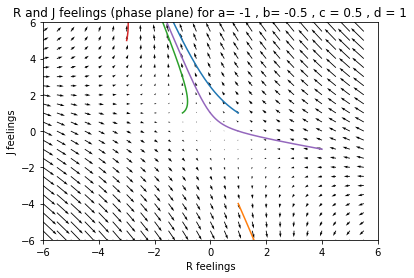

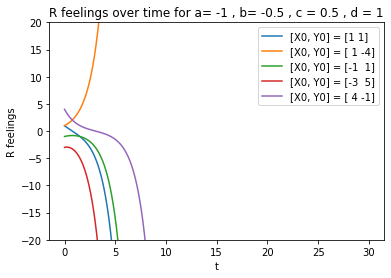

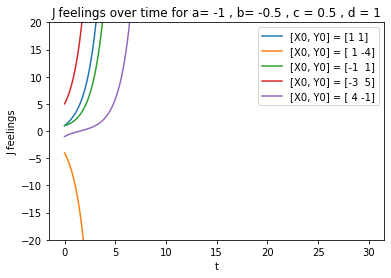

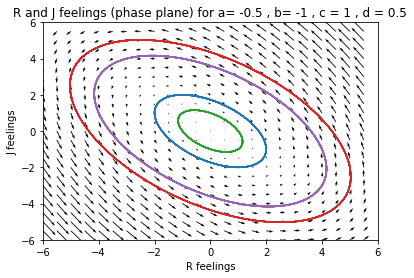

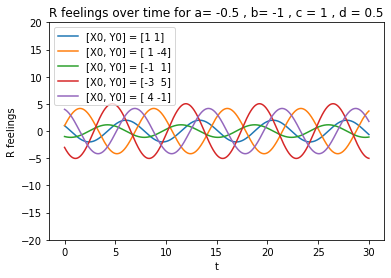

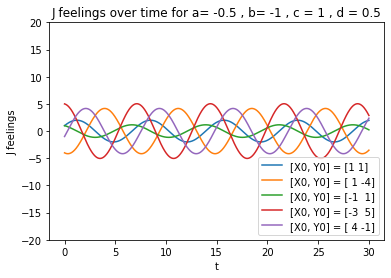

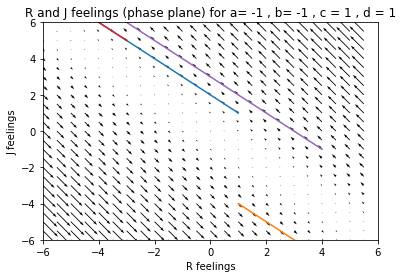

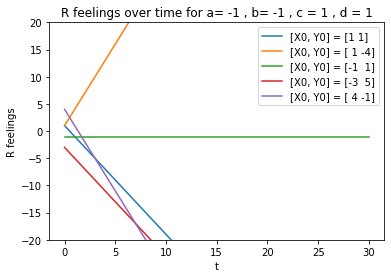

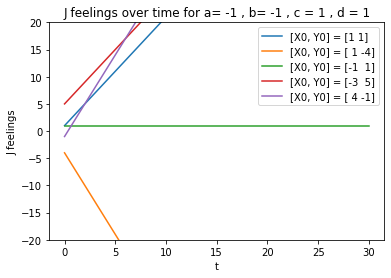

In [254]:
#Let's make a longer time array for this question
#Time vector parameters
Tmax = 30
dt = 1000

#POLAR OPPOSITES: a = -d, b = -c
#SENARIO 1: The magnitudes of a and d > the magnitudes of c and d
a = -1
b = -.5
c = .5
d = 1

ode_func_2 (a, b, c, d, xmin, xmax, ymin, ymax, dx, dy, Tmax, dt, x_init, y_init, plot_min, plot_max)


#SENARIO 2: The magnitudes of a and d < the magnitudes of c and d
a = -.5
b = -1
c = 1
d = .5

ode_func_2 (a, b, c, d, xmin, xmax, ymin, ymax, dx, dy, Tmax, dt, x_init, y_init, plot_min, plot_max)


#SENARIO 3: The magnitudes of a and d = the magnitudes of c and d
a = -1
b = -1
c = 1
d = 1

ode_func_2 (a, b, c, d, xmin, xmax, ymin, ymax, dx, dy, Tmax, dt, x_init, y_init, plot_min, plot_max)



There are a couple of different situations that are possible for the relationship depending on the magnitude of the parameters.

When the magnitudes of a and d > the magnitudes of b and c, then there is a saddle point in the phase plane. This means that for  a = -d and b = -c, the feelings of R and J will tend to diverge. Either R becomes very positive and J becomes very hateful, or J becomes very positive and R becomes very hateful. Theoretically, there is one exception: if the initial condition of the relationship begins along the eigenvector corresponding to the negative eigenvalue for the parameter matrix, then the feelings of both individuals will converge to zero. 

When the magnitudes of a and d < the magnitudes of b and c, then there is a stable spiral in the phase plane. This means that the feelings of both J and R will oscillate over time between certain hateful and loving feelings depending on how the other is feeling. When R is very loving, J begins to become hateful; this causes R to become hateful, and which causes J to become loving; this causes R to become loving and the cycle repeats. 

One final, interesting senario, is if the magnitues of a and d = the magnitudes of b and c. In this case, both eigenvalues become zero. The result is that for most initial conditions, J and R feelings change in a linear manner over time. How these feelings develop is dependant upon the inital conditions. There is a line in the phase plane defined by the vector -1,1). Initial relationship conditions above this line will have R feelings become hateful linearly over time and J feelings become loving linearly with respect to time. Initial relationship conditions below this line will have R feelings become lovinglinearly over time and J feelings become hateful linearly with respect to time. If the initial relationship condition is a multiple of the vector (-1,1) then feelings by both R and J will remain constant over time. 

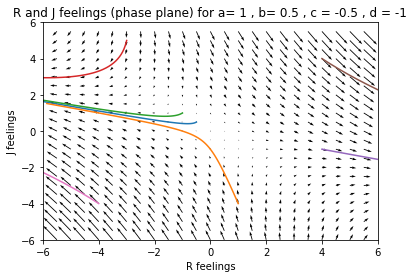

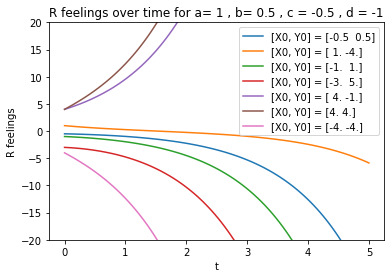

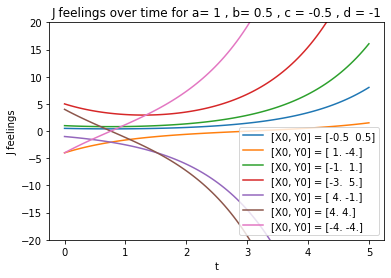

[ 0.8660254 -0.8660254]


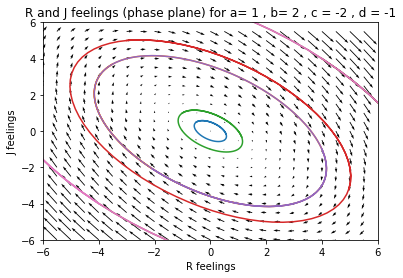

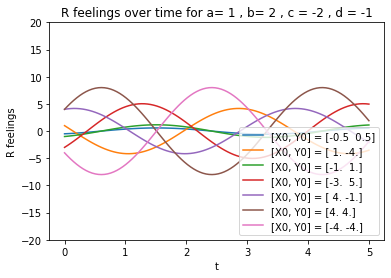

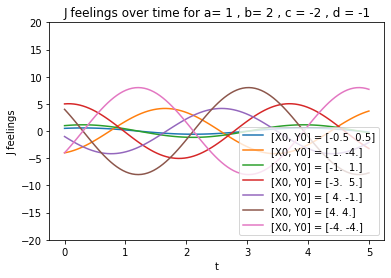

[2.42337678e-16+1.73205081j 2.42337678e-16-1.73205081j]


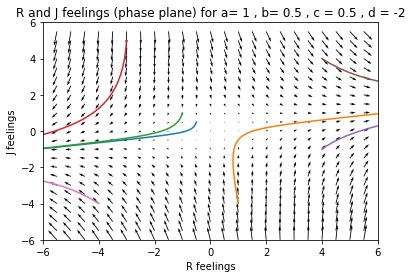

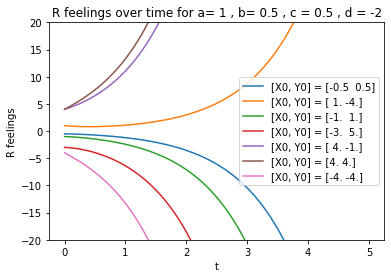

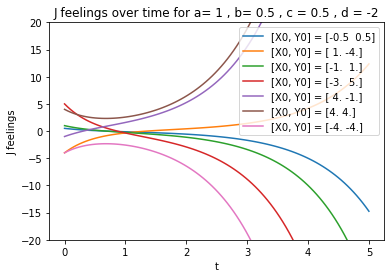

[ 1.08113883 -2.08113883]


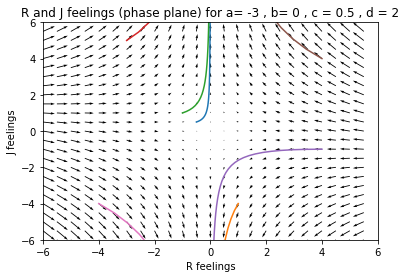

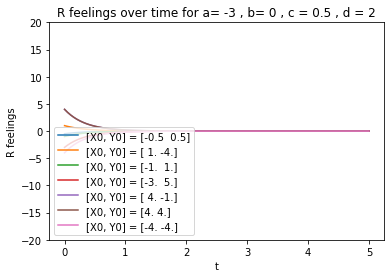

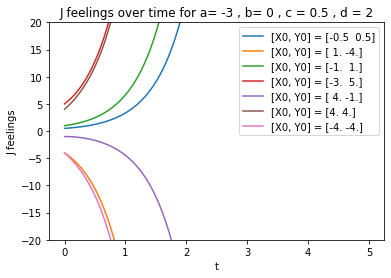

[ 2. -3.]


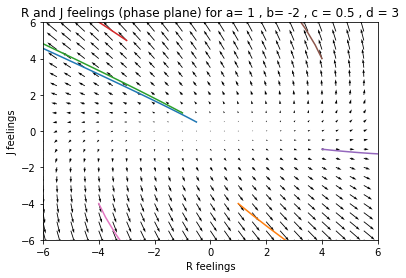

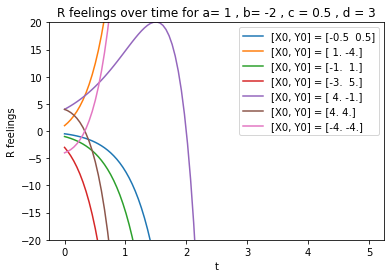

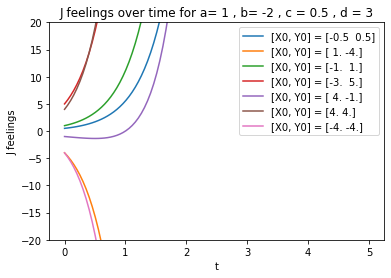

[1.99999999 2.00000001]


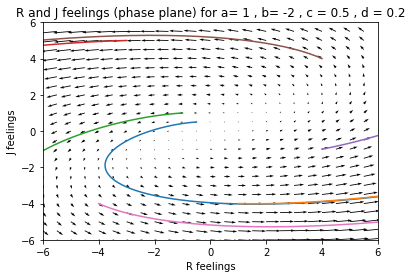

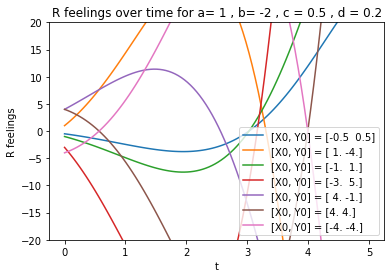

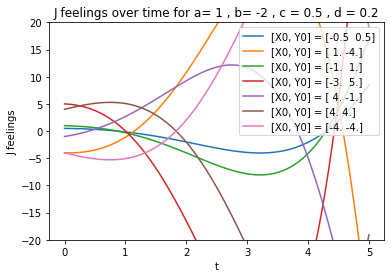

[0.6+0.91651514j 0.6-0.91651514j]
